KeyboardInterrupt: 

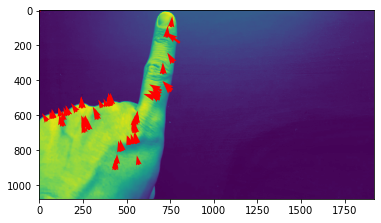

In [3]:
import matplotlib.pyplot as plt
from tracker import Tracker
from IPython import display
import time
from matplotlib import animation
import numpy as np
import cv2
%load_ext autoreload
%autoreload 2

fname = "../../data/O-H.mp4"
cap = cv2.VideoCapture(fname)
cap2 = cv2.VideoCapture(fname)
i = 0
while i < 350:
    cap.read()
    cap2.read()
    i +=1 
t = Tracker(cap, threshold=0.05, region_size=15, scale=0.2)
for i, flow in enumerate(t):
    
    plt.gca().clear()
    plt.imshow(t.curr_frame)
    plt.quiver(flow[:,1], flow[:,0], flow[:,3]*10, flow[:,2]*10, color='red', scale_units='xy', scale=1, angles='xy' )
    #plt.scatter(flow[:,1],flow[:,0], s=1, color='r')
    #plt.scatter(t.feature_points[:,1],t.feature_points[:,0], s=1, color='r')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.1)

[[  2   3   5 ...  19  19  19]
 [  2   3   5 ...  19  19  19]
 [  2   3   5 ...  19  19  19]
 ...
 [175 175 175 ...   3   3   3]
 [177 175 175 ...   3   3   3]
 [178 177 177 ...   3   3   3]]
[[  2   3   5 ...  22  21  19]
 [  2   3   5 ...  22  21  19]
 [  2   3   5 ...  22  21  19]
 ...
 [177 177 177 ...   3   3   3]
 [174 174 174 ...   3   3   3]
 [174 174 174 ...   3   3   3]]
[[  0   0   0 ... 253 254   0]
 [  0   0   0 ... 253 254   0]
 [  0   0   0 ... 253 254   0]
 ...
 [254 254 254 ...   0   0   0]
 [  3   1   1 ...   0   0   0]
 [  4   3   3 ...   0   0   0]]
(308109, 2)
49788


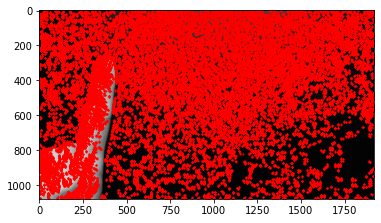

KeyboardInterrupt: 

In [ ]:
for i, t in enumerate(vectors):
    _, f = cap2.read()
    f = cv2.cvtColor(f, )
    self.curr_frame = cv2.cvtColor(self.curr_frame, cv2.COLOR_BGR2GRAY)
    plt.gca().clear()
    plt.imshow(video[i])
    plt.quiver(t[:,1], t[:,0], t[:,3]*10, t[:,2]*10, color='red', scale_units='xy', scale=1, angles='xy' )
    #plt.scatter(t[:,1],t[:,0], s=1, color='r')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.01)

In [ ]:
%%capture profile_results
import cProfile
import pandas as pd

cProfile.run('[t for t in Tracker(video)]')
## Parse the stdout text and split it into a table
data=[]
started=False

for l in profile_results.stdout.split("\n"):
    if not started:
        if l=="   ncalls  tottime  percall  cumtime  percall filename:lineno(function)":
            started=True
            data.append(l)
    else:
        data.append(l)
content=[]
for l in data:
    fs = l.find(" ",8)
    content.append(tuple([l[0:fs] , l[fs:fs+9], l[fs+9:fs+18], l[fs+18:fs+27], l[fs+27:fs+36], l[fs+36:]]))
prof_df = pd.DataFrame(content[1:], columns=content[0])

In [ ]:
figsize=(10,10)
fig, ax = plt.subplots(figsize=figsize)
img = ax.imshow(video[0])
print(vectors[0][:,0])
def animate(frame_no, img, vectors, ax):
    img.set_data(video[frame_no])
    quiv = ax.quiver(vectors[frame_no][:,1], vectors[frame_no][:,0], vectors[frame_no][:,2], vectors[frame_no][:,3], color='red', scale_units='xy', scale=1, angles='xy' )
    return [img, quiv]
ani = animation.FuncAnimation(fig, animate, range(len(vectors)), interval=50, blit=True, fargs=(img, vectors, ax))
mywriter = animation.FFMpegWriter(fps = 20,extra_args=['-threads', '30'])
ani.save("test.mp4",writer=mywriter)

: 